Building a machine learning model
 
There are four steps to build and use a machine learning model.

- Preprocessing ramdomize, normalize, shuffle, clean EDA, split train test
- Learning hyper,
- Evaluation metrics, tests, over undert
- Prediction

# Implémentation de l'agorithme de Gradient Descent

Maitenant, on va implémenter les fonctions de base de l'agorithme de gradient descent pour trouver la barrière de descision. On commence avec des fonctions qui vont vous aider à visualiser les donnéés.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_points(X, y):
    good_choice = X[np.argwhere(y==1).flatten()]
    bad_choice = X[np.argwhere(y==0).flatten()]
    plt.scatter(bad_choice[:, 0], bad_choice[:, 1], s = 50, color = 'red', marker='x')
    plt.scatter(good_choice[:, 0], good_choice[:, 1], s = 50, color = 'green', marker="^")

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

# Reading and plotting the data

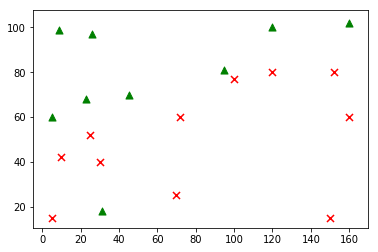

In [2]:
data = pd.read_csv('viager.csv')
X = np.array(data.drop('y', axis=1))
y = np.array(data['y'])
plot_points(X,y)
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [64]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * np.dot(x.T, d_error)
    bias -= learnrate * d_error
    return weights, bias

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [65]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.

In [76]:
train(X, y, epochs, learnrate, True)

ValueError: shapes (2,) and (1,) not aligned: 2 (dim 0) != 1 (dim 0)

In [45]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError


# inherit from base class Layer
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

In [14]:
# inherit from base class Layer
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [15]:
import numpy as np

# activation function and its derivative
def tanh(x):
    return 1 / (1 + np.exp(-x));

def tanh_prime(x):
    return tanh(x) * (1 - tanh(x));

In [16]:
import numpy as np

# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

In [17]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None
        self.errors = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            # print('epoch %d/%d   error=%f' % (i+1, epochs, err))

In [14]:
X = X.reshape(20, 1, 2)
y = y.reshape(20, 1, 1)



# network
net = Network()
net.add(FCLayer(2, 1))
net.add(ActivationLayer(tanh, tanh_prime))

# train
net.use(mse, mse_prime)
net.fit(X, y, epochs=1000, learning_rate=0.01)

# predict
out = np.asarray(net.predict(X))

threshold = 0.5

predictions = out > threshold

accuracy = np.multiply(np.mean((predictions == y).astype(int)), 100)
print("Accuracy: ", accuracy, "%")



Accuracy:  60.0 %


In [12]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [14]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
features = np.c_[xx.ravel(), yy.ravel()]
print(features.shape)

(34932500, 2)


In [ ]:
import seaborn as sns

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
features.reshape(features.shape[0], 1, 2)
Z = np.asarray(net.predict(features))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
sns.scatterplot(X0, X1, hue=y, cmap=plt.cm.coolwarm, s=100, edgecolors='k')
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.show()

# true positive false positive

metrics/model evaluation

In [21]:
import seaborn as sns

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_descision_boundary(estimator, X, y):
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    target = np.c_[xx.ravel(), yy.ravel()]
    target = target.reshape(target.shape[0], 1, target.shape[1])
    Z = estimator.predict(target)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    sns.scatterplot(X0, X1, hue=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    #plt.xlim(-1, 2)
    #plt.ylim(-2, 2)
    plt.show()

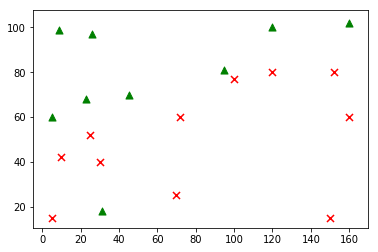

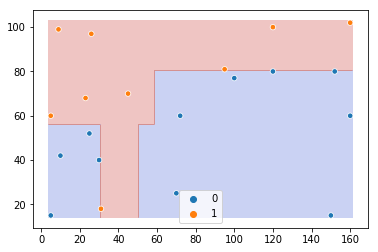

In [24]:
data = pd.read_csv('viager.csv')
X = np.array(data.drop('y', axis=1))
y = np.array(data['y'])
plot_points(X,y)
plt.show()

from sklearn.ensemble import GradientBoostingClassifier


cls = GradientBoostingClassifier()

cls.fit(X, y)

plot_descision_boundary(cls, X, y)

In [69]:
df = pd.read_csv('learning_curves.csv');
X = np.array(df.drop('y', axis=1))
y = np.array(df['y'])



def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    y[y == -1] = 0 
    return X2, Y2

X, y = randomize(X, y)

In [68]:
X = X.reshape(X.shape[0], 1,  X.shape[1])
y = y.reshape(-1,1, 1)

print(X.shape, y.shape)

ValueError: cannot reshape array of size 200 into shape (100,1,1)

[1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 1.]


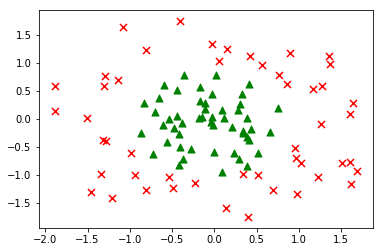

(100, 1, 2) (100, 1, 1)


In [11]:
#data = pd.read_csv('viager.csv')
#X = np.array(data.drop('y', axis=1))
#y = np.array(data['y'])


df = pd.read_csv('learning_curves.csv');
X = np.array(df.drop('y', axis=1))
y = np.array(df['y'])


def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    Y2[Y2 == -1] = 0 
    return X2, Y2

X, y = randomize(X, y)


print(y)

plot_points(X,y)
plt.show()


X = X.reshape(X.shape[0], 1,  X.shape[1])
y = y.reshape(-1,1, 1)

print(X.shape, y.shape)

In [79]:
X = X.reshape(X.shape[0], 1,  X.shape[1])
y = y.reshape(-1,1, 1)

print(X.shape, y.shape)

(20, 1, 2) (20, 1, 1)


In [18]:
# network
net = Network()
net.add(FCLayer(2, 1))
net.add(ActivationLayer(tanh, tanh_prime))

# train
net.use(mse, mse_prime)
net.fit(X, y, epochs=5000, learning_rate=1)

# predict
out = np.asarray(net.predict(X))

threshold = 0.5

predictions = out > threshold

print(predictions)

accuracy = np.multiply(np.mean((predictions == y).astype(int)), 100)
print("Accuracy: ", accuracy, "%")

[[[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[False]]

 [[ True]]

 [[ True]]

 [[False]]

 [[ True]]

 [[False]]

 [[ True]]

 [[ True]]

 [[False]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[False]]

 [[ True]]

 [[False]]

 [[ True]]

 [[ True]]

 [[False]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[False]]

 [[ True]]

 [[ True]]

 [[False]]

 [[ True]]

 [[False]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[False]]

 [[ True]]

 [[False]]

 [[ True]]

 [[ True]]

 [[False]]

 [[False]]

 [[ True]]

 [[ True]]

 [[False]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[False]]

 [[ True]]

 [[ True]]

 [[ True]]

 [[False]]

 [[ True]]

 [[ True]]

 [[False]]

 [[ True]]

 [[False]]

 [[ True]]

 [[ True]]

 [[False]]

 [[ True]]

 [[ True]]

 [[F

(276, 279)


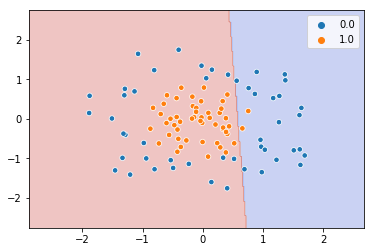

In [44]:
def plot_descision_boundary(estimator, X, y):
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    target = np.c_[xx.ravel(), yy.ravel()]
    target = target.reshape(target.shape[0], 1, target.shape[1])
    Z = (np.asarray(estimator.predict(target)) > 0.5).astype(int)

    print(xx.shape)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    
   
    
    sns.scatterplot(X0, X1, hue=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    #plt.xlim(-1, 2)
    #plt.ylim(-2, 2)
    plt.show()

    
df = pd.read_csv('learning_curves.csv');
X = np.array(df.drop('y', axis=1))
y = np.array(df['y'])
X, y = randomize(X, y)
plot_descision_boundary(net, X, y)